# Prediction using Supervised Machine Learning

## Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Loading and displaying the dataset

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Plotting the distribution of scores

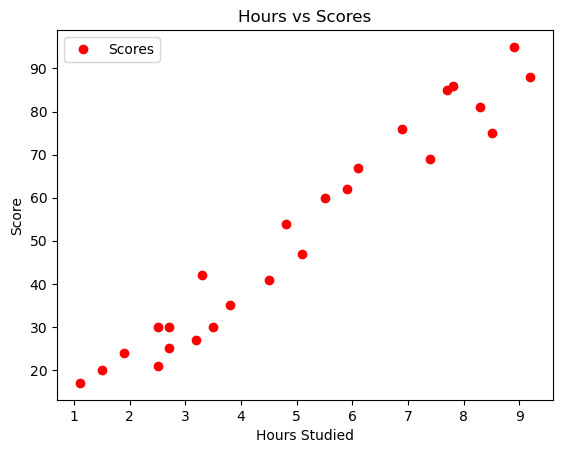

In [3]:
data.plot(x='Hours', y='Scores', style='o',c = 'red')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

## Implementing linear regression  from scratch

In [4]:
class LinearRegression:
    def fit(self,x,y):
        x_mean , y_mean  = np.mean(x),np.mean(y)
        x_mean_diff, y_mean_diff = x-x_mean , y - y_mean
        self.b1 = (x_mean_diff @ y_mean_diff)/(x_mean_diff @ x_mean_diff)
        self.b0 = y_mean - (self.b1*x_mean)
        return self
        
    def predict(self,x):
        return self.b0 + x*self.b1
    
    def evaluate(self,x,y):
        y_pred = self.predict(x)
        y_diff = y-y_pred
        rmse = np.sqrt(y_diff @ y_diff/x.shape[0])
        print("RMSE:",rmse)
        

## Regression plot function

In [5]:
def plot(x,y,model,title = ""):
    plt.figure(figsize = (6,5))
    plt.title(title)
    plt.xlim(1,10)
    plt.ylim(20,100)
    plt.xlabel('Hours')
    plt.ylabel('Scores')
    
    x_line = np.array([np.min(x) - 100,np.max(x) + 100]).reshape(-1,1)
    y_line = model.predict(x_line)
    
    plt.scatter(x,y,c = 'red', label = 'Original data points')
    plt.plot(x_line,y_line,linewidth = 3,label = 'Regression line')
    plt.legend()

## Training the model and fitting the best fit line

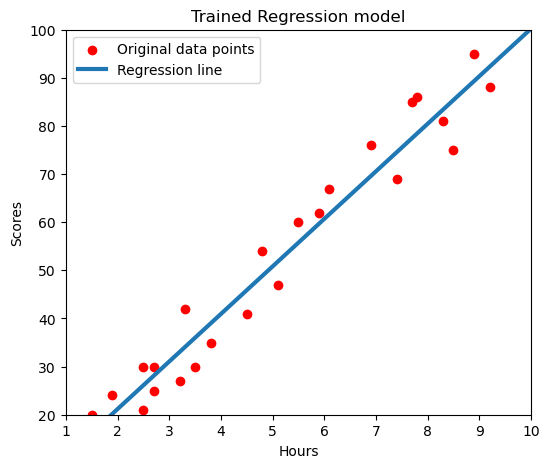

In [6]:
x = data['Hours'].values
y = data['Scores'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
model = LinearRegression()
model.fit(x_train,y_train)
plot(x,y,model,title = 'Trained Regression model')

## Testing the model

In [7]:
y_pred = model.predict(x_test)
testing = pd.DataFrame({"Actual":y_test ,"Predicted":y_pred})
testing

,Actual,Predicted
0,24,20.195790
1,17,12.294854
2,25,28.096725
3,76,69.576637
4,30,28.096725


## Testing the model with study hour '9.25' per day 

In [8]:
hours = 9.25
test = model.predict(hours)
print(f"Spending 9.25 hours per day will make a student able to score {test:.2f}% marks.")

Spending 9.25 hours per day will make a student able to score 92.79% marks.


## **Evaluating the model using "Root Mean Squared Error"**

In [9]:
Evaluate = model.evaluate(x,y)

RMSE: 5.407995753931536
